### 목표
- 머신러닝에서 사용해봤던 iris 품종 예측 다중분류 문제를 신경망으로 풀어보자!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [2]:
data = mnist.load_data(0)

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
len(data)

2

In [4]:
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [5]:
(X_train, y_train), (X_test, y_test) = data

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

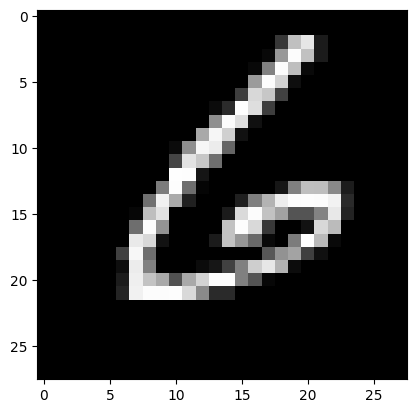

In [8]:
plt.imshow(X_train[59998], cmap='gray');

### 정답 데이터 원핫인코딩
- pd.get_dummies : 판다스 지원 원핫인코딩
- to_categorical : keras 지원 원핫인코딩

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
to_categorical(y_train)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [11]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [12]:
y_train_one_hot.shape, y_test_one_hot.shape

((60000, 10), (10000, 10))

- 인공신경망에는 2차원인 이미지 데이터를 한 번에 넣을 수 없기 때문에 데이터의 차원을 전부 1차원으로 변경시켜준 뒤 학습시켜야함

In [13]:
# -1은 60000을 제외한 나머지 값들을 다 곱해서 하나의 차원으로 만들어
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(10000, -1)

In [14]:
X_train.shape, X_test.shape
# 이미지는 픽셀 하나하나가 데이터의 특성으로 인식

((60000, 784), (10000, 784))

### 신경망 모델링
- 직접 모델링해 봅시다

In [15]:
# 입력되는 특성 수
# 출력층 활성화 함수, 뉴런수
# loss함수
# 최적화함수(Adam, SGD 둘다 시도)

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [17]:
model = Sequential()

model.add(Dense(512, input_dim=784, activation='sigmoid'))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

In [20]:
h = model.fit(X_train, y_train_one_hot, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1742 - acc: 0.9455
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1679 - acc: 0.9470
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1592 - acc: 0.9489
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1581 - acc: 0.9493
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1472 - acc: 0.9521
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1385 - acc: 0.9559
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1331 - acc: 0.9574
Epoch 8/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1318 - acc: 0.9580
Epoch 9/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1278 - acc: 0.9592
Epoch 10/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1237 - acc: 0.9605
Epoch 11/30
1875/1875 [======

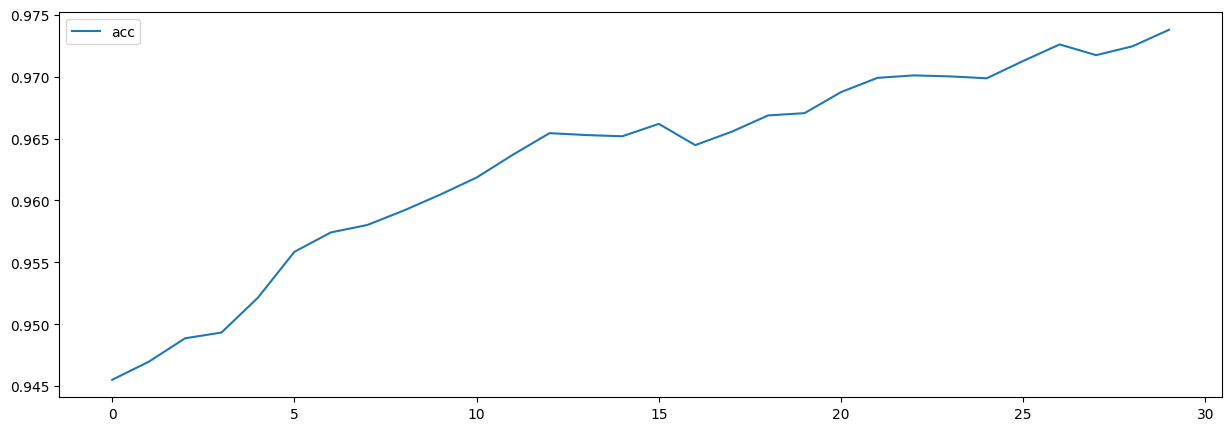

In [21]:
plt.figure(figsize=(15, 5))

plt.plot(h.history['acc'], label='acc')
plt.legend()
plt.show()

In [22]:
model.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 1s 4ms/step - loss: 0.1072 - acc: 0.9695


[0.1071983054280281, 0.9695000052452087]

In [28]:
model1 = Sequential()

model1.add(Dense(512, input_dim=784, activation='sigmoid'))
model1.add(Dense(256, activation='sigmoid'))
model1.add(Dense(128, activation='sigmoid'))
model1.add(Dense(64, activation='sigmoid'))

model1.add(Dense(10, activation='softmax'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
_________________________________________________________________


In [29]:
model1.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['acc'])

In [30]:
h1 = model1.fit(X_train, y_train_one_hot, epochs=30, batch_size=128, verbose=1)

Epoch 1/30
469/469 [==============================] - 3s 4ms/step - loss: 2.3138 - acc: 0.1188
Epoch 2/30
469/469 [==============================] - 2s 5ms/step - loss: 2.2842 - acc: 0.1300
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 2.2685 - acc: 0.1884
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 2.2466 - acc: 0.2748
Epoch 5/30
469/469 [==============================] - 2s 5ms/step - loss: 2.2123 - acc: 0.3452
Epoch 6/30
469/469 [==============================] - 2s 5ms/step - loss: 2.1543 - acc: 0.3717
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 2.0561 - acc: 0.3984
Epoch 8/30
469/469 [==============================] - 2s 4ms/step - loss: 1.9141 - acc: 0.4375
Epoch 9/30
469/469 [==============================] - 2s 4ms/step - loss: 1.7423 - acc: 0.4785
Epoch 10/30
469/469 [==============================] - 2s 4ms/step - loss: 1.5571 - acc: 0.5329
Epoch 11/30
469/469 [============================

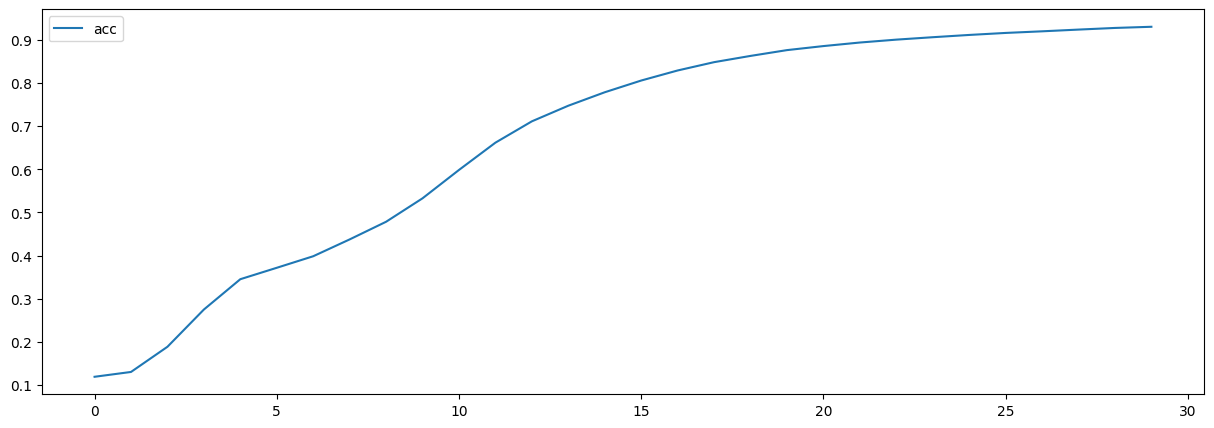

In [31]:
plt.figure(figsize=(15, 5))

plt.plot(h1.history['acc'], label='acc')
plt.legend()
plt.show()

In [32]:
model1.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 1s 3ms/step - loss: 0.3216 - acc: 0.9222


[0.32162466645240784, 0.9222000241279602]

### 과대적합을 확인하기 위해 train데이터에서 validation데이터를 분리해서 학습시 같이 출력해보자!

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_val, y_train_one_hot, y_val_one_hot = train_test_split(X_train, y_train_one_hot,
                                                                  random_state=33
                                                                  )

In [35]:
print(X_train.shape)
print(X_val.shape)
print(y_train_one_hot.shape)
print(y_val_one_hot.shape)

(45000, 784)
(15000, 784)
(45000, 10)
(15000, 10)


In [36]:
model2 = Sequential()

model2.add(Dense(512, input_dim=784, activation='sigmoid'))
model2.add(Dense(256, activation='sigmoid'))
model2.add(Dense(128, activation='sigmoid'))
model2.add(Dense(64, activation='sigmoid'))

model2.add(Dense(10, activation='softmax'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               401920    
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 10)                650       
                                                                 
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
_________________________________________________________________


In [37]:
model2.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['acc'])

In [39]:
h2 = model2.fit(X_train, y_train_one_hot, epochs=30, batch_size=128, validation_data=(X_val, y_val_one_hot))

Epoch 1/30
352/352 [==============================] - 2s 5ms/step - loss: 2.2886 - acc: 0.1160 - val_loss: 2.2834 - val_acc: 0.2501
Epoch 2/30
352/352 [==============================] - 2s 4ms/step - loss: 2.2789 - acc: 0.1571 - val_loss: 2.2729 - val_acc: 0.1180
Epoch 3/30
352/352 [==============================] - 2s 5ms/step - loss: 2.2675 - acc: 0.1731 - val_loss: 2.2604 - val_acc: 0.3207
Epoch 4/30
352/352 [==============================] - 2s 6ms/step - loss: 2.2527 - acc: 0.2674 - val_loss: 2.2430 - val_acc: 0.2763
Epoch 5/30
352/352 [==============================] - 2s 7ms/step - loss: 2.2324 - acc: 0.3447 - val_loss: 2.2189 - val_acc: 0.3158
Epoch 6/30
352/352 [==============================] - 2s 5ms/step - loss: 2.2032 - acc: 0.3972 - val_loss: 2.1836 - val_acc: 0.3908
Epoch 7/30
352/352 [==============================] - 2s 5ms/step - loss: 2.1592 - acc: 0.4376 - val_loss: 2.1297 - val_acc: 0.4486
Epoch 8/30
352/352 [==============================] - 2s 4ms/step - loss: 2.

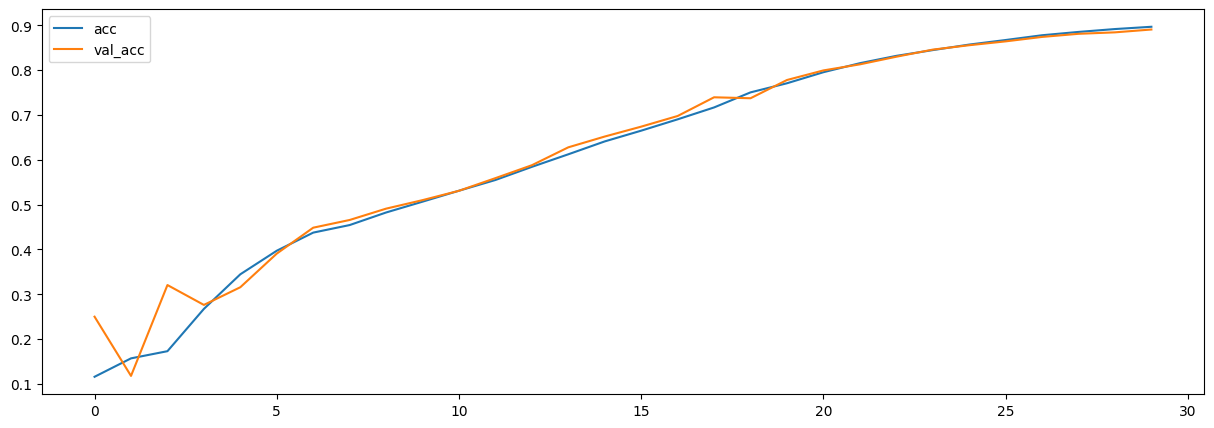

In [43]:
plt.figure(figsize=(15, 5))

plt.plot(h2.history['acc'], label='acc')
plt.plot(h2.history['val_acc'], label='val_acc')

plt.legend()
plt.show()

In [ ]:
plt.plot(h.history['acc'], label='acc')